[*********************100%***********************]  1 of 1 completed


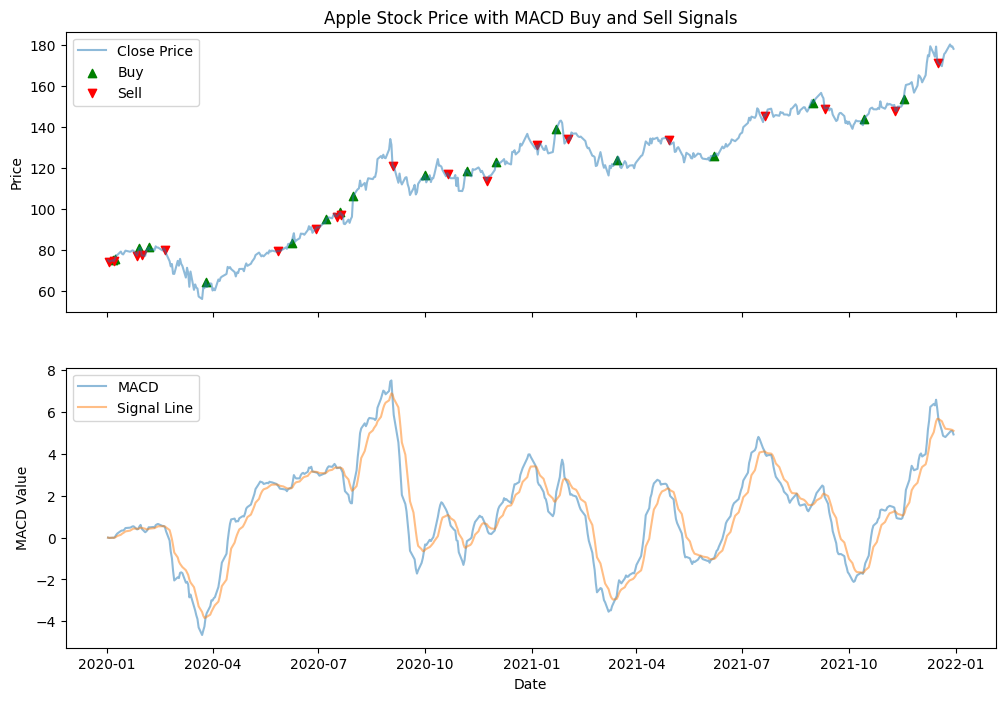

In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Get stock data for Apple
ticker = "AAPL"
data = yf.download(ticker, start="2020-01-01", end="2021-12-31")

# Calculate the MACD and Signal line indicators
short_window = 12
long_window = 26
signal_window = 9

data["EWMA_short"] = data["Close"].ewm(span=short_window).mean()
data["EWMA_long"] = data["Close"].ewm(span=long_window).mean()
data["MACD"] = data["EWMA_short"] - data["EWMA_long"]
data["Signal"] = data["MACD"].ewm(span=signal_window).mean()

# Find the buy and sell signals
data["Signal_Diff"] = data["MACD"] - data["Signal"]
data["Buy_Signal"] = np.where(data["Signal_Diff"].shift(1) <= 0, data["Signal_Diff"], np.nan)
data["Sell_Signal"] = np.where(data["Signal_Diff"].shift(1) >= 0, data["Signal_Diff"], np.nan)

buy_signals = data[data["Buy_Signal"] > 0].index
sell_signals = data[data["Sell_Signal"] < 0].index

# Plot the stock price, MACD, and signal line
fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 8), sharex=True)

# Plot the stock price
ax1.plot(data.index, data["Close"], label="Close Price", alpha=0.5)
ax1.set_ylabel("Price")
ax1.set_title("Apple Stock Price with MACD Buy and Sell Signals")
ax1.scatter(buy_signals, data.loc[buy_signals]["Close"], color="g", marker="^", alpha=1, label="Buy")
ax1.scatter(sell_signals, data.loc[sell_signals]["Close"], color="r", marker="v", alpha=1, label="Sell")
ax1.legend(loc="upper left")

# Plot the MACD and signal line
ax2.plot(data.index, data["MACD"], label="MACD", alpha=0.5)
ax2.plot(data.index, data["Signal"], label="Signal Line", alpha=0.5)
ax2.set_ylabel("MACD Value")
ax2.set_xlabel("Date")
ax2.legend(loc="upper left")

plt.show()


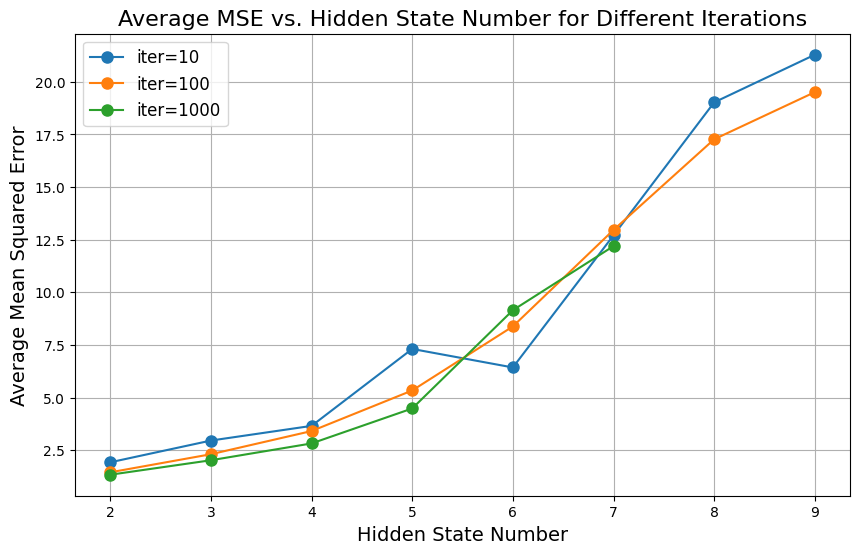

In [18]:
import matplotlib.pyplot as plt

hidden_state_numbers = [2, 3, 4, 5, 6, 7, 8, 9]

# Average MSE for different iterations
average_mse_iter10 = [1.9248872700004, 2.95804929774543, 3.6547855422909947, 7.310877776702272, 6.430746807476899, 12.707398208448797, 19.02569851752439, 21.289967405947504]
average_mse_iter100 = [1.44901022457729, 2.30820068726044, 3.409399033499813, 5.337028390425533, 8.37981368086836, 12.963569816826302, 17.272268140507045, 19.5116907316197]
average_mse_iter1000 = [1.3344901757598675, 2.0221834709695486, 2.821032940153939, 4.481890669830584, 9.150620008391549, 12.196178624838016]

plt.figure(figsize=(10, 6))

plt.plot(hidden_state_numbers, average_mse_iter10, marker='o', linestyle='-', markersize=8, label='iter=10')
plt.plot(hidden_state_numbers, average_mse_iter100, marker='o', linestyle='-', markersize=8, label='iter=100')
plt.plot(hidden_state_numbers[:6], average_mse_iter1000, marker='o', linestyle='-', markersize=8, label='iter=1000')

plt.xlabel('Hidden State Number', fontsize=14)
plt.ylabel('Average Mean Squared Error', fontsize=14)
plt.title('Average MSE vs. Hidden State Number for Different Iterations', fontsize=16)

plt.legend(fontsize=12)
plt.grid()
plt.show()


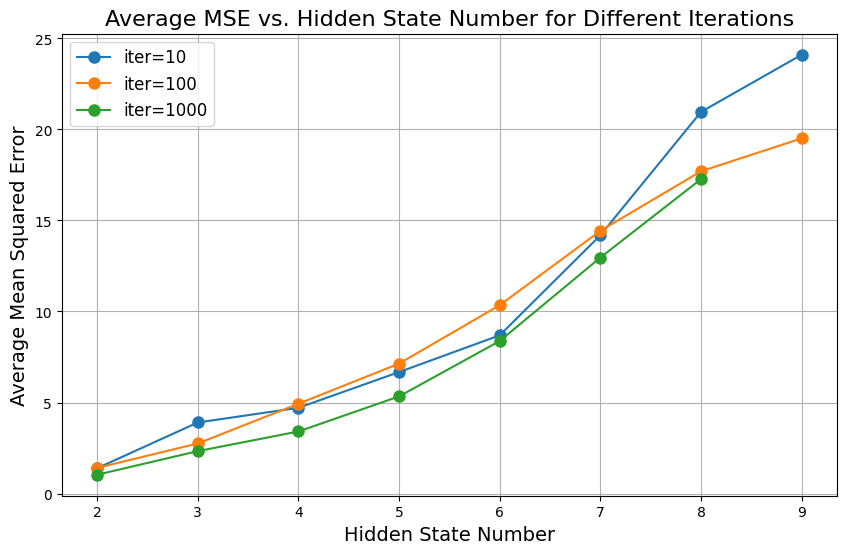

In [16]:
import matplotlib.pyplot as plt

hidden_state_numbers = [2, 3, 4, 5, 6, 7,8,9]

# Average MSE for different iterations
average_mse_iter10 = [1.390603312614202, 3.9033324105184897, 4.710380039786679, 6.673584191432981, 8.691710626242623, 14.188360024045329, 20.963229500077862, 24.10387956694144]
average_mse_iter100 = [1.410078239895773, 2.750679956067429, 4.932763625881064, 7.137804621531584, 10.346804417874441, 14.434115391705262, 17.70202931739431, 19.5116907316197]
average_mse_iter1000 = [1.0344901022457729, 2.330820068726044, 3.409399033499813, 5.337028390425533, 8.37981368086836, 12.963569816826302, 17.272268140507045]

plt.figure(figsize=(10, 6))

plt.plot(hidden_state_numbers, average_mse_iter10, marker='o', linestyle='-', markersize=8, label='iter=10')
plt.plot(hidden_state_numbers, average_mse_iter100, marker='o', linestyle='-', markersize=8, label='iter=100')
plt.plot(hidden_state_numbers[:7], average_mse_iter1000, marker='o', linestyle='-', markersize=8, label='iter=1000')

plt.xlabel('Hidden State Number', fontsize=14)
plt.ylabel('Average Mean Squared Error', fontsize=14)
plt.title('Average MSE vs. Hidden State Number for Different Iterations', fontsize=16)

plt.legend(fontsize=12)
plt.grid()
plt.show()

